In [1]:
import pandas as pd
import numpy as np
import sys
import os
from sklearn.model_selection import train_test_split
from tabpfn import TabPFNRegressor

# 将当前工作目录添加到 Python 路径
# 获取当前工作目录
current_working_dir = os.getcwd()

# 将根目录添加到 sys.path
sys.path.append(os.path.abspath(os.path.join(current_working_dir, '../..')))

In [2]:
# 读取数据
data = pd.read_csv('../dataset_reduced_num.csv')

columns_to_encode = ['Cation', 'Anion']
data_encoded = pd.get_dummies(data, columns=columns_to_encode)
data_encoded.shape

(582, 20)

In [21]:
# X = data_encoded.drop(['Cs'], axis=1)
# y = data_encoded['Cs']
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=1
# )

data_encoded['target_class'] = pd.qcut(data_encoded['Cs'], q=10, labels=False)
X = data_encoded.drop(['Cs', 'target_class'], axis=1)
y = data_encoded['Cs']
stratify_column = data_encoded['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=stratify_column)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


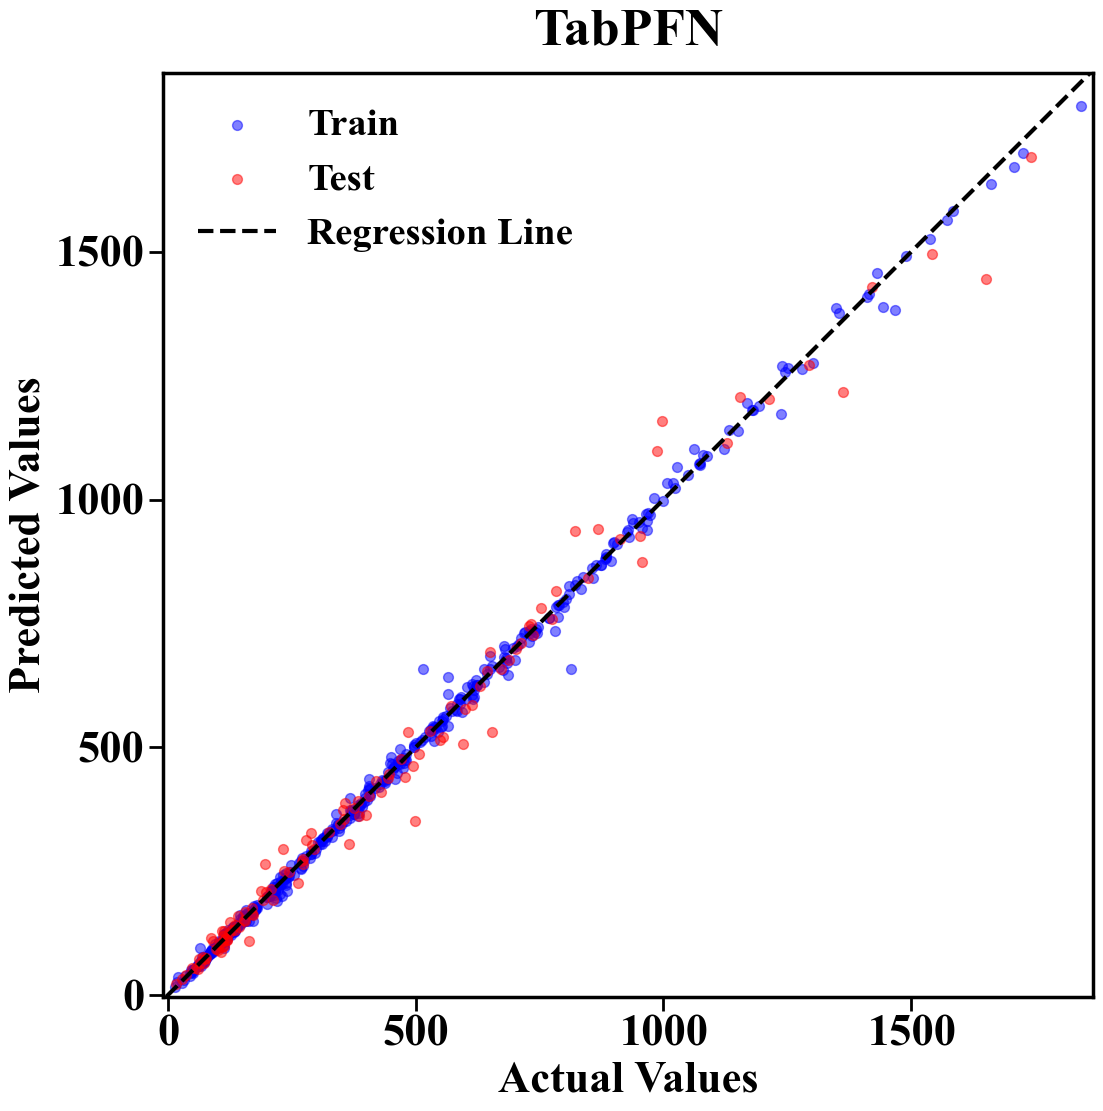

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,TabPFN,0.998,8.47,2.77,16.2,0.987,25.15,7.32,43.88


In [22]:
# 初始化TabPFN回归模型
model = TabPFNRegressor()

# 训练模型
model.fit(X_train, y_train)

# 预测
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 评估
from function import metrics_to_dataframe, plot_actual_vs_predicted
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'TabPFN', figpath='TabPFN_actual_vs_predicted.png')
tabpfn_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'TabPFN')
tabpfn_metrics